# Machine Learning Aplicado con Python

Este proyecto tiene como objetivo utilizar distintas librerías de Python (Scikit-learn, pandas, numpy, matplotlib, etc...) para entender todo el flujo de trabajo que se realiza cuando se resuelve un problema de Aprendizaje Supervisado de Machine Learning. En este caso, se busca predecir los ingresos que tendrá una película en base a un histórico de datos de películas de la plataforma imdb.

Otras disciplinas:
- Feature engineering
- Selección de modelos

## Antes de la Práctica:

***Hay que reconocer el tipo de aprendizaje que se necesita***

1. ¿Qué beneficio se piensa generar y para quién?  
2. ¿Cuál de las siguientes funcionalidades sería más útil para lograr ese objetivo?:  
        A. Predecir una métrica  
        B. Predecir una etiqueta  
        C. Agrupar elementos similares  
        D. Optimizar un proceso con prueba y error  
    
Los dos primeros corresponden a **Aprendizaje supervisado**.  

***Hay que aterrizar el problema de aprendizaje supervisado***.  

1. ¿El valor que se quiere predecir es de qué tipo?  
        A. Continuo
        B. Discreto
2. ¿Cuál es la definición de éxito de la predicción?
3. ¿Con qué datos se contará para hacer la predicción?
4. ¿A qué disciplina en particular pertenece la pregunta que se está tratando de resolver?
5. Considerando la intucipon sobre la disciplina, ¿Pueden los datos permitir predecir el objetivo?

### Contexto del Problema

Contexto: Un *ente gubernamental* quiere definir sus políticas de financiamiento de producciones cinematográficas nacionales.

**Sus objetivos son:**  
1. **Ayudar** a la producción de películas de calidad **que no logran ser autosustentables**  
2. Saber qué películas tienen más dificultad de recuperar lo gastado en el presupuesto.  

Por consiguiente, el ente gubernamental quiere **predecir una métrica**: El ingreso mundial generado por una película.  

### Desarrollo del Problema

Estando ubicados en el contexto del problema, se podrían responder las anteriores preguntas de la siguiente manera:

1. Los ingresos de una película corresponden a **valores continuos**
2. El éxito será "**qué tan cerca se está del valor real de ingreso generado por la película**"
3. Los datos se recogerán de **bases de datos públicas de internet**
4. El dominio de trabajo es la **industria del cine**, en particular de la distribución de películas.
5. Los datos podrán permitir predecir el objetivo. De forma general existen características que permiten determinar si una película será exito o no, como: **calidad, actores, presupuesto, etc...**

### Preparación de datos

***NumPy***: librería de matriz n-dimensional base  
***Pandas***: estructura de datos y análisis  
***Matplotlib***: trazado completo 2D  
***Seaborn***: visualización estadística de datos  

In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**%matplotlib inline** permite que los gráficos estén renderizados directamente en el Notebook.

In [2]:
%matplotlib inline

Se cargan los datos desde un github que contiene un archivo csv.
Dicho archivo se convierte a un DataFrame de pandas.

In [3]:
movies_url = 'https://github.com/JuanPabloMF/datasets-platzi-course/raw/master/datasets/peliculas.csv'
movies_df = pd.read_csv(movies_url, encoding='utf-8')

#### Columnas del DataFrame

Variables predictoras:  
**movie_title**: *Título de la película*  
**title_year**: *Año de estreno de la película*  
**duration**: *Duración de la película en minutos*  
**language**: *Lenguaje original de la película*  
**country**: *País que produció la película*  
**genres**: *Género(s) de la película*  
**content_rating**: *Para qué público va dirigida la película*  
**plot_keywords**: *Palabras clave que definen la película*  
**director_name**: *Nombre del director principal de la película*  
**actor_1_name, actor_2_name, actor_3_name**: *Actores principales que actúan en la película*  
**cast_total_facebook_likes**: *Número total de likes que tiene el casting en Facebook*  
**budget**: *Cuánto presupuesto tiene la película*  
**imdb_score**: *Qué score tiene la película en imdb*  

Variable objetivo:  
**gross**: *Cuánto generó de ingreso la película*  

In [4]:
# se visualizan los primeros registros del DataFrame
movies_df.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [5]:
# visualización de las columnas
movies_df.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

## Entendimiento de los datos

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [7]:
movies_df.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

#### Separación de datos

In [8]:
# Obtención de columnas numéricas
movies_num_df = movies_df.select_dtypes(exclude=['object'])
movies_num_df.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [9]:
# Obtención de columnas de texto (object)
movies_obj_df = movies_df.select_dtypes(include=['object'])
movies_obj_df.head()

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Color,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Color,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Color,English,UK,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Color,English,USA,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN


#### Estadísticas

Algunas estadísticas numéricas:  

- El promedio de likes del casting de las películas es de **9700 likes**
- Una película dura en promedio **107 minutos**
- La película con más duración es de **511 minutos**
- La película con menos duración es de **7 minutos**

In [10]:
# Estadísticas de las columnas numéricas
movies_num_df.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


<AxesSubplot:>

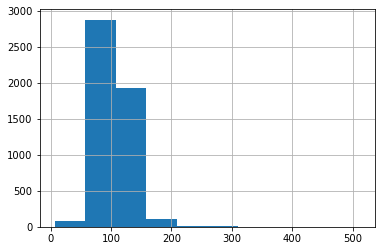

In [11]:
movies_num_df['duration'].hist()

<AxesSubplot:>

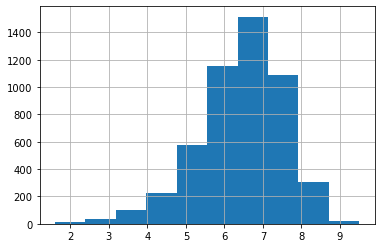

In [12]:
movies_num_df['imdb_score'].hist()

<AxesSubplot:>

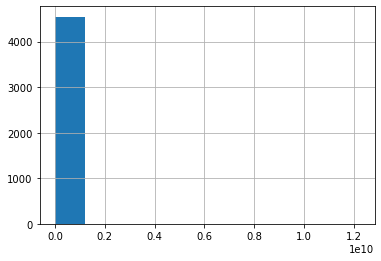

In [13]:
movies_num_df['budget'].hist()

Se alcanzan a ver problemas de limpieza de los datos. La BDD fue creada sin diferenciar:

- La moneda en la que se ingresaba el presupuesto y el ingreso.
- La zona(país/mundial) en la que se registró el ingreso.

Se arreglará haciendo un merge con otro dataset.

### Haciendo un Join entre dos datasets

In [14]:
thenumbers_url = 'https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/thenumbers.csv'
financials_df = pd.read_csv(thenumbers_url, encoding='utf-8')

In [15]:
financials_df = financials_df[['movie_title', 'production_budget', 'worldwide_gross']]

In [16]:
financials_df

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
...,...,...,...
4336,The Mongol King,7000,900
4337,Signed Sealed Delivered,5000,0
4338,Shanghai Calling,3967,10443
4339,A Plague So Pleasant,1400,0


In [17]:
print(financials_df.shape)
print(movies_df.shape)

(4341, 3)
(5043, 19)


En este caso se priorizará la calidad de los datos sobre la cantidad.
Tendremos que trabajar con los 4341 datos que tiene el dataframe financials.

Antes de poder aplicar la función merge de pandas, se necesita agregar la misma llave con la que se podrá hacer el join al dataframe numérico de películas (porque no tiene la columna movie_titles).

Hay que **concatenar** la columna

In [18]:
movies_df['movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

con...

In [19]:
movies_num_df.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [20]:
# Al dataframe movies_num_df se le concatena la columa movie_title. axis=1 -> concatenación de columna.
movies_num_df = pd.concat([movies_num_df, movies_df['movie_title']], axis=1)
movies_num_df

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,Signed Sealed Delivered
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN,The Following
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,A Plague So Pleasant
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,Shanghai Calling


Se hace el merge, uniendo el DataFrame financials con el de movies_num_df.  
La llave para hacer el join será 'movie_title'.  
El Join será de tipo Left. Guardará las llaves que estén presentes siempre en financials y no solamente en movies_num_df.

In [21]:
movies_df_v2 = pd.merge(financials_df, movies_num_df, on='movie_title', how='left')

In [22]:
movies_df_v2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [23]:
movies_df_v2.shape

(4385, 11)

### Limpieza de Datos Nulos

In [24]:
# notnull muestra si un dato no es nulo
movies_df_v2.notnull()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,True,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,True,True,False,True,True,True,True,True,False


In [25]:
# Definición: The apply() function is used to apply a function along an axis of the DataFrame
# value_counts cuenta el número de valores en una columna.
movies_df_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


Ahora se buscaran valores que relacionados con el cero, en vez de nulo.

In [26]:
(movies_df_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


No se puede entrenar un algoritmo con datos cuya variable objetivo (worldwide_gross) no está definida o es nula (valor False). Hay que eliminar esas líneas.

In [27]:
# Se crea un nuevo dataframe. Si en movies_df_v2 un valor es cero o es nulo, el valor en el nuevo dataframe será False.
notzero_notnull_df = ((movies_df_v2 != 0) & (movies_df_v2.notnull()))

In [28]:
notzero_notnull_df

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,False,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,False,True,False,True,True,False,True,True,False


In [29]:
# Al revisar una linea, si toda la línea tiene valores True, el valor que lanzará será True. De lo contrario será False.
notzero_notnull_df.all(axis=1)

0        True
1       False
2        True
3        True
4        True
        ...  
4380    False
4381    False
4382    False
4383    False
4384     True
Length: 4385, dtype: bool

In [30]:
notzero_notnull_df.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

Son muchos los datos que se perderían si se tomara la decisión de borrar todas las filas que contengan nulos o que contengan un valor de cero. Se toma la decisión de eliminar solo las filas cuya variable objetiva sea nulo o sea cero.

In [31]:
notzero_notnull_wwgross = notzero_notnull_df['worldwide_gross']
movies_df_v2 = movies_df_v2[notzero_notnull_wwgross]

In [32]:
((movies_df_v2 != 0) & (movies_df_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

### Retirando columna de tipo objeto

In [33]:
movies_df_v2 = movies_df_v2.drop('movie_title', axis=1)

Retirando columna duplicada

In [34]:
movies_df_v2 = movies_df_v2.drop('duration.1', axis=1)

In [35]:
movies_df_v2.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,4834,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,143,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,48350,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,11700,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,106759,250000000.0,8.5,448130642.0


Luego de eliminar datos de la variable objetivo. se considera terminada la parte de limpieza de datos. Utilizaremos scikit-learn para tratar con los datos faltantes de las variables predictoras.

### Imputación de datos faltantes con *scikit-learn*

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [37]:
values = imputer.fit_transform(movies_df_v2)

In [38]:
values

array([[4.25000000e+08, 2.78391898e+09, 2.00900000e+03, ...,
        2.37000000e+08, 7.90000000e+00, 7.60505847e+08],
       [3.06000000e+08, 2.05866222e+09, 2.00213073e+03, ...,
        4.04553863e+07, 7.10000000e+00, 4.83193329e+07],
       [3.00000000e+08, 9.63420425e+08, 2.00700000e+03, ...,
        3.00000000e+08, 7.10000000e+00, 3.09404152e+08],
       ...,
       [7.00000000e+03, 9.00000000e+02, 2.00500000e+03, ...,
        3.25000000e+03, 7.80000000e+00, 4.83193329e+07],
       [3.96700000e+03, 1.04430000e+04, 2.01200000e+03, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 1.81041000e+05, 2.00400000e+03, ...,
        1.10000000e+03, 6.60000000e+00, 8.52220000e+04]])

In [44]:
X = pd.DataFrame(values)
X.columns = movies_df_v2.columns
X.index = movies_df_v2.index
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [45]:
X.to_csv('X.csv', index=False)

## Scikit-learn

Existe una API fácil de ocupar y unificada. Esta unificación se da por un objeto llamado **Estimator**, que tiene para cada algoritmo de Machine Learning una API que es común y tres métodos clave.

Scikit-learn es la librería más usada de Machine Learning tradicional. La librería incluye funcionalidades de:

- Preprocesamiento de datos en *sklearn.preprocessing*
- Algoritmos de Machine Learning en *sklearn.linear_model, sklearn.svm, sklearn.ensemble, etc...*
- Evaluación de modelos en *sklearn.model_selection* y *sklearn.metrics*

#### Estimator

Los 3 métodos mas importantes del Estimador son:

- **Fit**: Entrena el modelo.
- **Predict**: Predice valores, con datos nuevos.
- **Score**: Mide el performace del algoritmo y nos indica una probabilidad.